<a href="https://colab.research.google.com/github/ratnesh003/IIT-Gandhinagar-Assignment/blob/main/Gandinagar_2nd_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train and Compare Classic ML Models

## Installing Dependencies and Importing methods

In [59]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install google-colab
!pip install seaborn

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, LeaveOneGroupOut, KFold

## Mounting the google drive
Mounting the google drive to load data into the python script <br>
the dataset break down as follows according to the file structure

In [61]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
!ls /content/drive/MyDrive/ML/human+activity+recognition+using+smartphones/UCI_HAR_Dataset/UCI_HAR_Dataset

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [63]:
common_path = '/content/drive/MyDrive/ML/human+activity+recognition+using+smartphones/UCI_HAR_Dataset/UCI_HAR_Dataset/'

features = pd.read_csv(common_path + 'features.txt', sep='\s+', header=None, names=['index', 'feature_name'])
feature_names = features['feature_name'].tolist()

print(f"Feature names: {feature_names}")
print(f"Number of Features: {len(feature_names)}")

Feature names: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc

## Data Loading and Merging
This code loads the training and test data from text files, then combines the subject, activity, and sensor data into one dataset for each (train and test) to prepare for analysis.

In [64]:
X_train = pd.read_csv(common_path + 'train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv(common_path + 'train/y_train.txt', sep='\s+', header=None, names=['activity'])
subject_train = pd.read_csv(common_path + 'train/subject_train.txt', sep='\s+', header=None, names=['subject'])

X_test = pd.read_csv(common_path + 'test/X_test.txt', sep='\s+', header=None)
y_test = pd.read_csv(common_path + 'test/y_test.txt', sep='\s+', header=None, names=['activity'])
subject_test = pd.read_csv(common_path + 'test/subject_test.txt', sep='\s+', header=None, names=['subject'])

train_data = pd.concat([subject_train, y_train, X_train], axis=1)
test_data = pd.concat([subject_test, y_test, X_test], axis=1)

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
train_data.head()

Train data shape: (7352, 563)
Test data shape: (2947, 563)


,subject,activity,0,1,2,3,4,5,6,7,...,551,552,553,554,555,556,557,558,559,560
0,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


##  Evaluation Metrics
Use the following metrics to evaluate each model:

- Accuracy
- Precision
- Recall
- F1 Score

Define these metrics as scorers for use with cross-validation:

In [65]:
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

## Training and Evaluating Models

### Training the Classical Machine Learning Models

- Random Forest classifier
- Decision Tree classifier
- Logistic Regression
- AdaBoost classifier

Training four classic machine learning models on the training dataset (X_train and y_train['activity']). Each model is configured with specific parameters to ensure consistent results during evaluation.

The random_state=42 ensures reproducibility by fixing the random number generation used for the model's internal operations.

In [66]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42).fit(X_train, np.ravel(y_train['activity'])),
    'Decision Tree': DecisionTreeClassifier(random_state=42).fit(X_train, np.ravel(y_train['activity'])),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42).fit(X_train, np.ravel(y_train['activity'])),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME').fit(X_train, np.ravel(y_train['activity']))
}

### K-Fold Cross Validation
performing K-Fold Cross-Validation (K-Fold CV) on the trained models to evaluate their performance on the test dataset.

In [67]:
kfold_results = {}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

print("K-Fold Cross-Validation:")
for name, model in models.items():
    cv_results = cross_validate(model, X_test, np.ravel(y_test['activity']), cv=kfold, scoring=scorers, return_train_score=False)
    kfold_results[name] = {metric: cv_results[f'test_{metric}'].mean() for metric in scorers.keys()}
    print(f"{name}: {kfold_results[name]}")

K-Fold Cross-Validation:
Random Forest: {'accuracy': 0.9843964202468994, 'precision': 0.9846691986970402, 'recall': 0.9843964202468994, 'f1': 0.9843712152355393}
Decision Tree: {'accuracy': 0.9379050962562229, 'precision': 0.9391980883354034, 'recall': 0.9379050962562229, 'f1': 0.9378884286076522}
Logistic Regression: {'accuracy': 0.9833742913872981, 'precision': 0.9836845677941486, 'recall': 0.9833742913872981, 'f1': 0.9833745904322366}
AdaBoost: {'accuracy': 0.40174441023279905, 'precision': 0.27752872885075164, 'recall': 0.40174441023279905, 'f1': 0.26104485229248164}


### LOSO Cross Validation
performing LOSO Cross-Validation (LOSO CV) on the trained models to evaluate their performance on the test dataset.

In [68]:
loso_results = {}

loso = LeaveOneGroupOut()
print("\nLeave-One-Subject-Out Cross-Validation:")

for name, model in models.items():
    cv_results = cross_validate( model, X_test, np.ravel(y_test['activity']), cv=loso.split(X_test, y_test['activity'], groups=subject_test['subject']), scoring=scorers)
    loso_results[name] = {metric: cv_results[f'test_{metric}'].mean() for metric in scorers.keys()}
    print(f"{name} (LOSO-CV): {loso_results[name]}")


Leave-One-Subject-Out Cross-Validation:
Random Forest (LOSO-CV): {'accuracy': 0.9135416455575656, 'precision': 0.9292953136932854, 'recall': 0.9135416455575656, 'f1': 0.9081804307758296}
Decision Tree (LOSO-CV): {'accuracy': 0.8142388098108515, 'precision': 0.836718622034254, 'recall': 0.8142388098108515, 'f1': 0.80744090397836}
Logistic Regression (LOSO-CV): {'accuracy': 0.9227485066336354, 'precision': 0.9394288424002151, 'recall': 0.9227485066336354, 'f1': 0.9203987955716586}
AdaBoost (LOSO-CV): {'accuracy': 0.39776741859473064, 'precision': 0.2259843527346088, 'recall': 0.39776741859473064, 'f1': 0.25603110714551724}


## Plotting The Performance metrics of the models

### Preformance Evaluation according to K-fold Cross Validation

The Evaluation Metric of the 4 models i.e. Random Forest classifier,  Decision Tree classifier, Logistic Regression, AdaBoost classifier form K-fold Cross Validation technique.

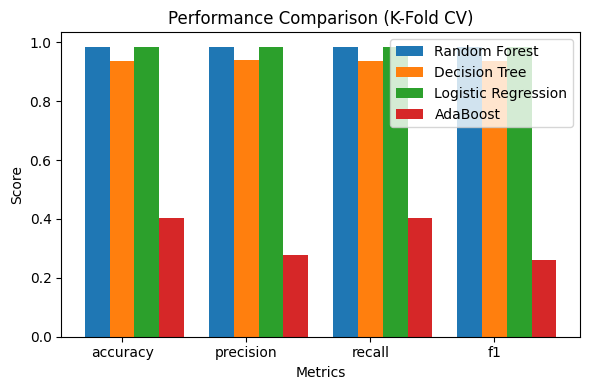

In [69]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(6, 4))

for i, (name, res) in enumerate(kfold_results.items()):
    ax.bar(x + i * width, [res[m] for m in metrics], width, label=name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison (K-Fold CV)')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

### Preformance Evaluation according to LOSO Cross Validation

The Evaluation Metric of the 4 models i.e. Random Forest classifier,  Decision Tree classifier, Logistic Regression, AdaBoost classifier form LOSO Cross Validation technique.

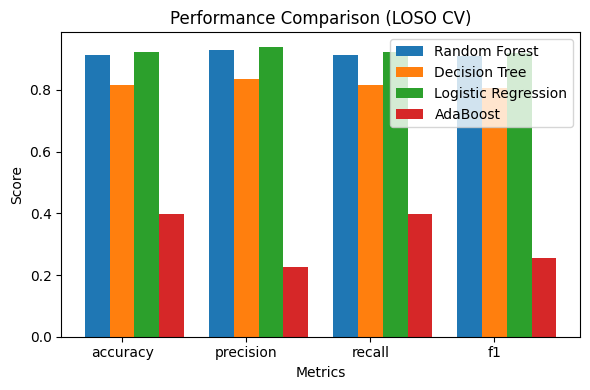

In [70]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(6, 4))

for i, (name, res) in enumerate(loso_results.items()):
    ax.bar(x + i * width, [res[m] for m in metrics], width, label=name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison (LOSO CV)')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()